## **Step 1: Import Required Libraries**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Step 2: Load the Dataset**


In [6]:
df = pd.read_csv("datasets/AB_NYC_2019.csv")
df.head()


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## **Step 3: Inspect the Dataset**


In [7]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values Count:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review       

## **Step 4: Visualize Missing Values**


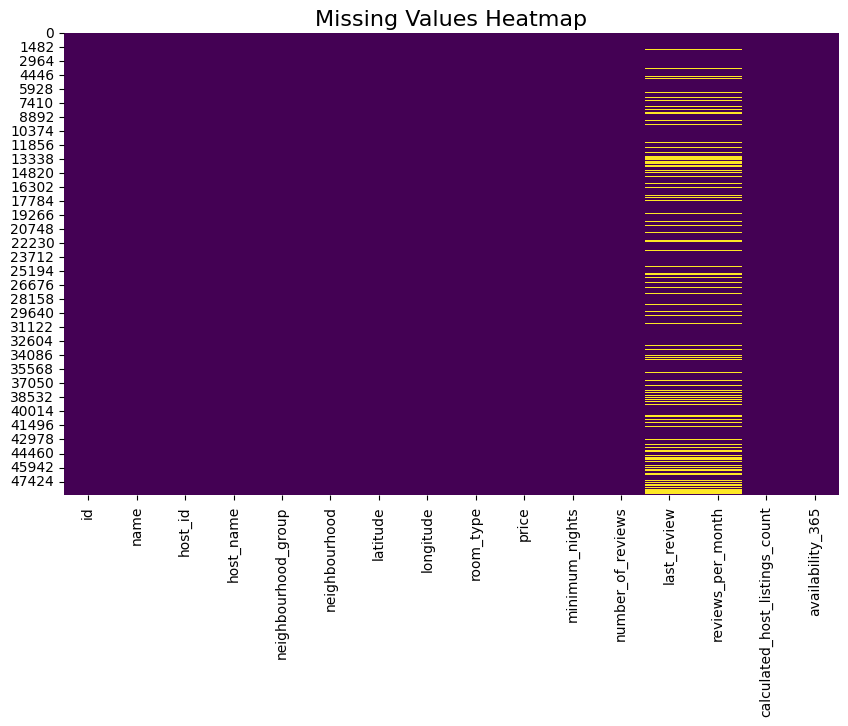

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()


## **Step 5: Handle Missing Data**


In [9]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['name'] = df['name'].fillna('unknown')
df['host_name'] = df['host_name'].fillna('unknown')


## **Step 6: Remove Duplicate Rows**


In [10]:
df.drop_duplicates(inplace=True)


## **Step 7: Standardize Data Formatting**


In [11]:
str_cols = df.select_dtypes(include='object').columns
for col in str_cols:
    df[col] = df[col].str.lower()


## **Step 8: Outlier Detection (Price)**


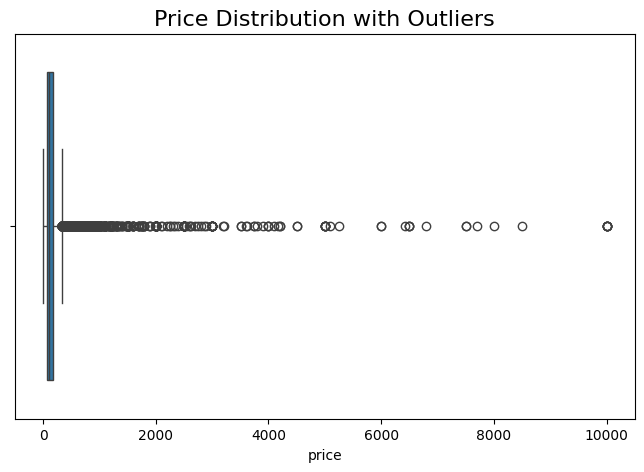

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title("Price Distribution with Outliers", fontsize=16)
plt.show()


## **Step 9: Handle Outliers**


In [13]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


## **Step 10: Price Distribution After Cleaning**


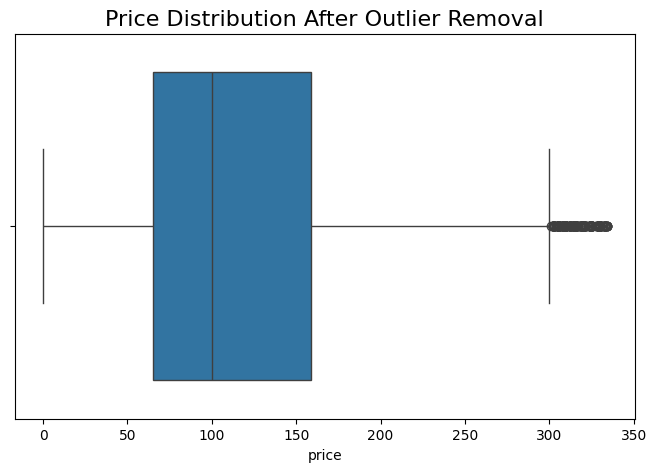

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title("Price Distribution After Outlier Removal", fontsize=16)
plt.show()


## **Step 11: Save the Cleaned Dataset**



In [17]:
df.to_csv("AB_NYC_2019_cleaned.csv", index=False)
print("Cleaned dataset saved as 'AB_NYC_2019_cleaned.csv'")
print("Final shape:", df.shape)


Cleaned dataset saved as 'AB_NYC_2019_cleaned.csv'
Final shape: (45923, 16)


## **Step 12: Summary of Improvements**


In [16]:
summary = {
    "Final Rows": df.shape[0],
    "Final Columns": df.shape[1],
    "Missing Values Remaining": df.isnull().sum().sum(),
    "Duplicate Rows Remaining": df.duplicated().sum()
}
summary


{'Final Rows': 45923,
 'Final Columns': 16,
 'Missing Values Remaining': np.int64(9012),
 'Duplicate Rows Remaining': np.int64(0)}